# Merge DataFrames

In [1]:
import pandas as pd

In [2]:
# Read Each CSV File
df_2018 = pd.read_csv('modis_2018_Portugal.csv')
df_2019 = pd.read_csv('modis_2019_Portugal.csv')
df_2020 = pd.read_csv('modis_2020_Portugal.csv')
df_2021 = pd.read_csv('modis_2021_Portugal.csv')
df_2022 = pd.read_csv('modis_2022_Portugal.csv')

In [3]:
# Optionally, add a 'year' column to each DataFrame if it doesn't exist
df_2018['year'] = 2018
df_2019['year'] = 2019
df_2020['year'] = 2020
df_2021['year'] = 2021
df_2022['year'] = 2022

# Concatenate the DataFrames
df_merged = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022], ignore_index=True)

In [4]:
df_merged.to_csv('merged_fire_data_2018_2022.csv', index=False)

# Load the Dataset

In [5]:
import pandas as pd

# Load the dataset
file_path = 'merged_fire_data_2018_2022.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,year
0,37.2196,-8.3315,300.2,1.1,1.0,2018-01-03,1120,Terra,MODIS,31,6.03,289.8,3.9,D,0,2018
1,38.5455,-7.8332,301.7,1.0,1.0,2018-01-17,1132,Terra,MODIS,48,6.03,287.4,5.5,D,0,2018
2,38.5437,-7.8218,303.5,1.0,1.0,2018-01-17,1132,Terra,MODIS,56,6.03,287.3,6.4,D,0,2018
3,37.8735,-7.5664,301.2,1.0,1.0,2018-01-17,1132,Terra,MODIS,46,6.03,288.5,5.0,D,0,2018
4,37.0640,-7.9822,301.3,1.1,1.0,2018-01-19,1120,Terra,MODIS,46,6.03,289.8,4.6,D,0,2018


# Data Overview

In [6]:
# Summary of the dataset
summary_info = {
    'Data Description': df.describe(),
    'Data Info': df.info(),
    'Missing Values': df.isnull().sum(),
    'Number of Unique Values per Column': df.nunique()
}

# Check the distribution of wildfires over the years
year_distribution = df['year'].value_counts()

summary_info['Year Distribution'] = year_distribution

summary_info['Data Description'], summary_info['Missing Values'], summary_info['Number of Unique Values per Column'], summary_info['Year Distribution']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7151 entries, 0 to 7150
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    7151 non-null   float64
 1   longitude   7151 non-null   float64
 2   brightness  7151 non-null   float64
 3   scan        7151 non-null   float64
 4   track       7151 non-null   float64
 5   acq_date    7151 non-null   object 
 6   acq_time    7151 non-null   int64  
 7   satellite   7151 non-null   object 
 8   instrument  7151 non-null   object 
 9   confidence  7151 non-null   int64  
 10  version     7151 non-null   float64
 11  bright_t31  7151 non-null   float64
 12  frp         7151 non-null   float64
 13  daynight    7151 non-null   object 
 14  type        7151 non-null   int64  
 15  year        7151 non-null   int64  
dtypes: float64(8), int64(4), object(4)
memory usage: 894.0+ KB


(          latitude    longitude   brightness         scan        track  \
 count  7151.000000  7151.000000  7151.000000  7151.000000  7151.000000   
 mean     40.202813    -8.058673   326.721256     1.672745     1.228569   
 std       1.655832     1.146209    26.090602     0.887823     0.266076   
 min      30.142400   -28.508800   300.000000     1.000000     1.000000   
 25%      39.477050    -8.444200   308.600000     1.100000     1.000000   
 50%      40.689900    -7.963800   319.600000     1.300000     1.100000   
 75%      41.476450    -7.551750   335.300000     2.000000     1.400000   
 max      42.123800    -6.298100   501.500000     4.800000     2.000000   
 
           acq_time   confidence       version   bright_t31          frp  \
 count  7151.000000  7151.000000  7.151000e+03  7151.000000  7151.000000   
 mean   1363.010628    73.154943  6.030000e+00   295.720347    82.546022   
 std     626.463220    23.123186  6.128860e-13    10.375583   225.678101   
 min     141.000000

In [7]:
# Convert 'acq_date' to datetime format
df['acq_date'] = pd.to_datetime(df['acq_date'])

# Check for duplicate records
duplicate_records = df.duplicated().sum()

# If there are duplicates, we might consider removing them
# df = df.drop_duplicates()

# Show the conversion and duplication check results
conversion_check = df['acq_date'].dtype, duplicate_records

conversion_check

(dtype('<M8[ns]'), 0)

/var/folders/cb/p8cff5793nq7ln19w8dps3cr0000gn/T/ipykernel_98024/4096333206.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette='viridis')


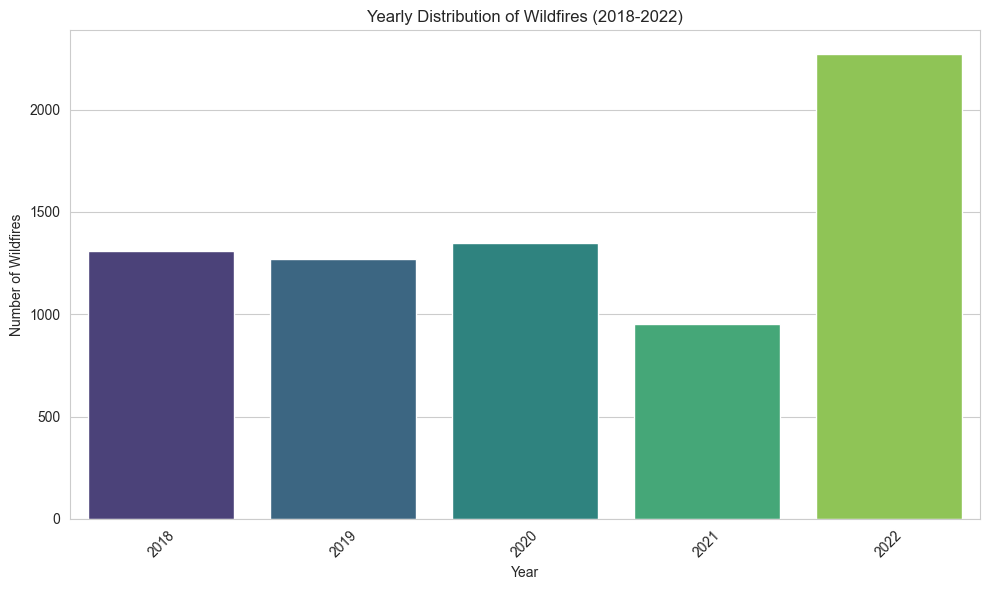

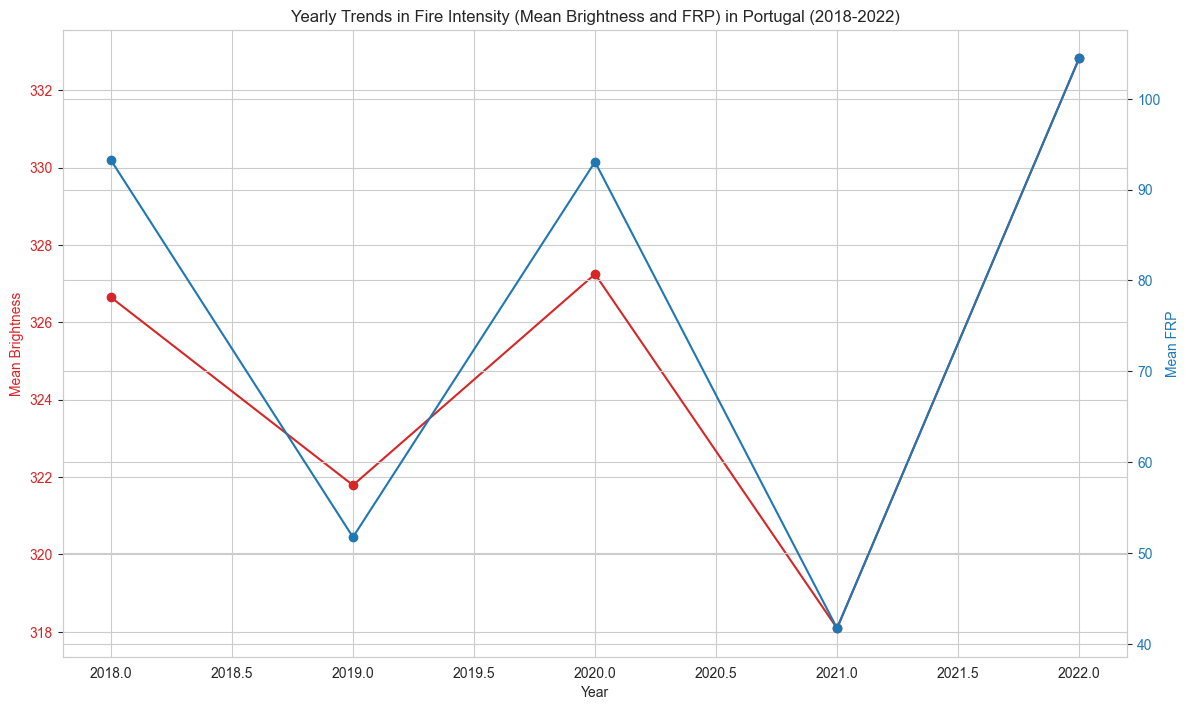

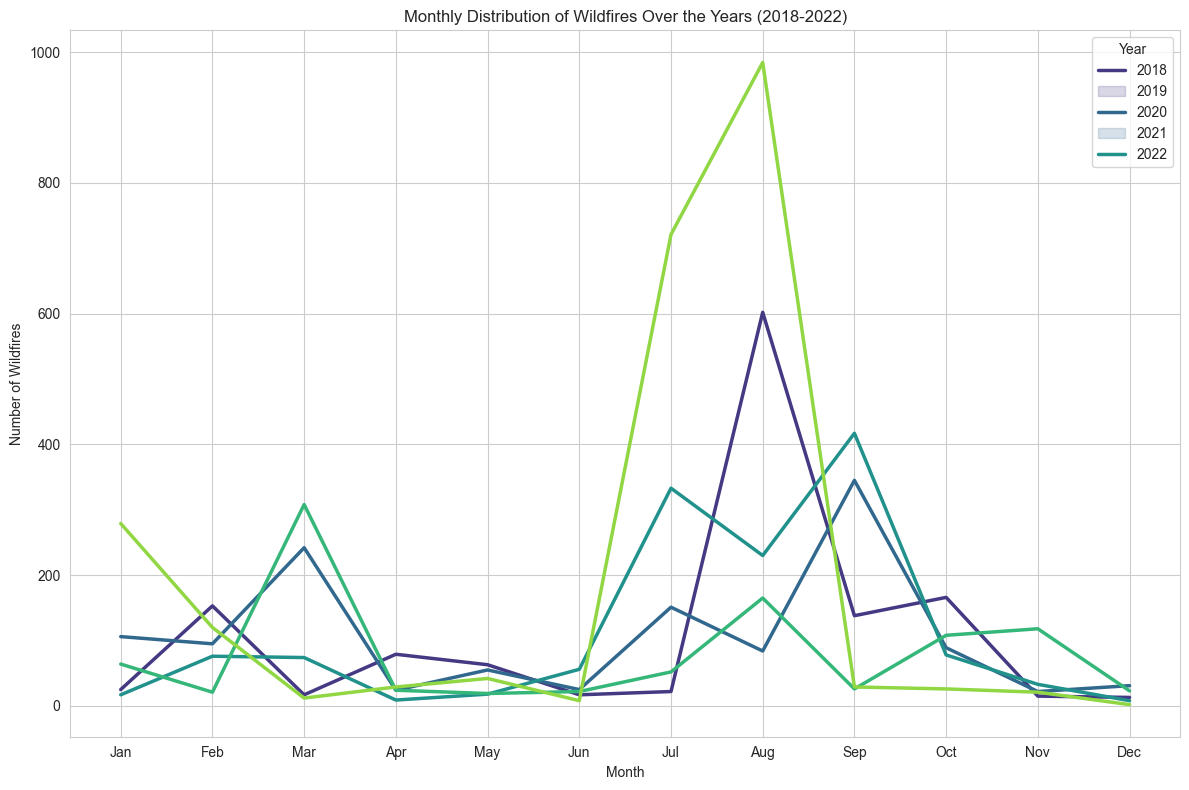

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Wildfire Trends Over Time

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Yearly Distribution of Wildfires
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df, palette='viridis')
plt.title('Yearly Distribution of Wildfires (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Wildfires')
plt.xticks(rotation=45)
plt.tight_layout()

# Prepare data for Monthly Distribution
df['month'] = df['acq_date'].dt.month
monthly_distribution = df.groupby(['year', 'month']).size().unstack(fill_value=0)


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Calculating yearly trends in fire intensity
yearly_intensity = df.groupby('year')[['brightness', 'frp']].mean()

# Plotting the Yearly Trend of Fire Intensity
fig, ax1 = plt.subplots(figsize=(12, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Brightness', color=color)
ax1.plot(yearly_intensity.index, yearly_intensity['brightness'], color=color, label='Mean Brightness', marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Mean FRP', color=color)  
ax2.plot(yearly_intensity.index, yearly_intensity['frp'], color=color, label='Mean FRP', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Yearly Trends in Fire Intensity (Mean Brightness and FRP) in Portugal (2018-2022)')
plt.show()

# Monthly Distribution of Wildfires
plt.figure(figsize=(12, 8))
sns.lineplot(data=monthly_distribution.T, dashes=False, palette='viridis', linewidth=2.5)
plt.title('Monthly Distribution of Wildfires Over the Years (2018-2022)')
plt.xlabel('Month')
plt.ylabel('Number of Wildfires')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', labels=monthly_distribution.index)
plt.tight_layout()

plt.show()

/var/folders/cb/p8cff5793nq7ln19w8dps3cr0000gn/T/ipykernel_97989/4277380303.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_frequency.index, y=monthly_frequency.values, palette='coolwarm')
/var/folders/cb/p8cff5793nq7ln19w8dps3cr0000gn/T/ipykernel_97989/4277380303.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_trends.index, y=seasonal_trends.values, palette='coolwarm')


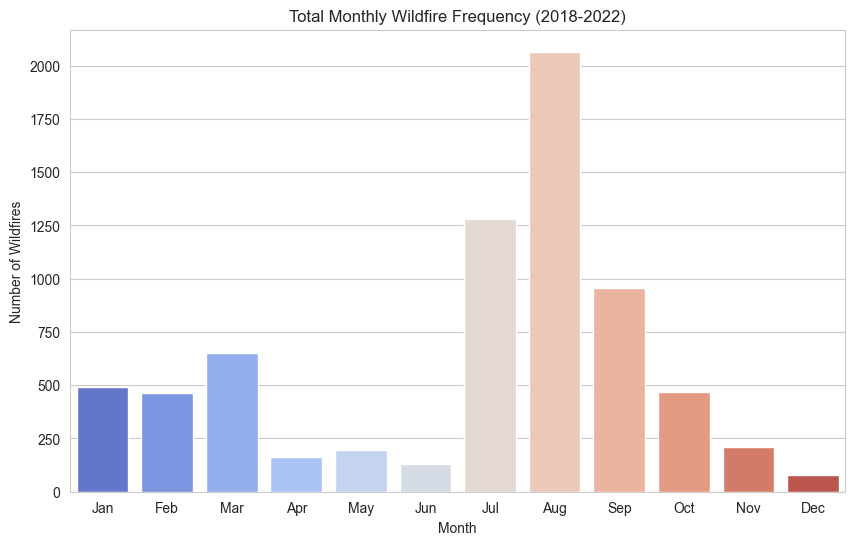

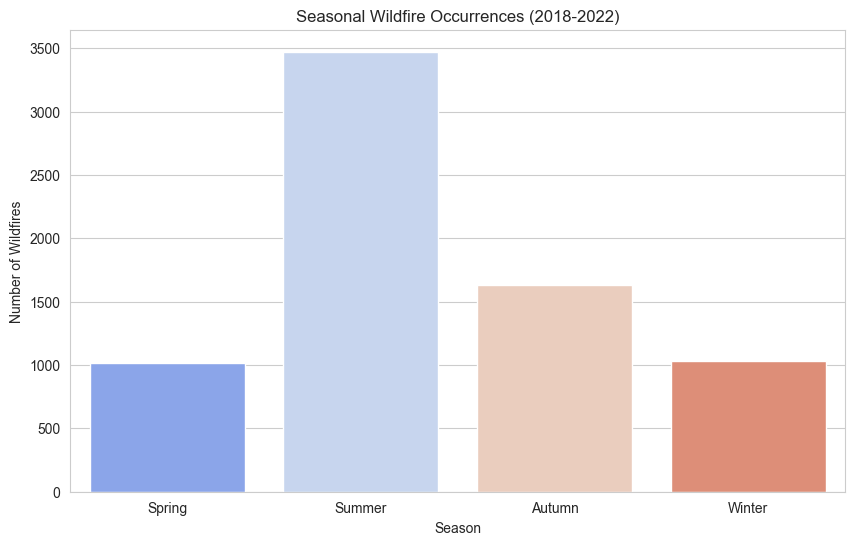

In [9]:
# Monthly Wildfire Frequency Over the Entire Period
monthly_frequency = df['month'].value_counts().sort_index()

# Plot Monthly Wildfire Frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_frequency.index, y=monthly_frequency.values, palette='coolwarm')
plt.title('Total Monthly Wildfire Frequency (2018-2022)')
plt.xlabel('Month')
plt.ylabel('Number of Wildfires')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Seasonal Trends
# Define the seasons
seasons = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Autumn': [9, 10, 11]
}

# Map each month to its season
df['season'] = df['month'].map(lambda x: next((season for season, months in seasons.items() if x in months), None))

# Calculate wildfires by season
seasonal_trends = df['season'].value_counts().reindex(['Spring', 'Summer', 'Autumn', 'Winter'])

# Plot Seasonal Trends in Wildfire Occurrences
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_trends.index, y=seasonal_trends.values, palette='coolwarm')
plt.title('Seasonal Wildfire Occurrences (2018-2022)')
plt.xlabel('Season')
plt.ylabel('Number of Wildfires')

plt.show()

# Analysis of Fire Intensity

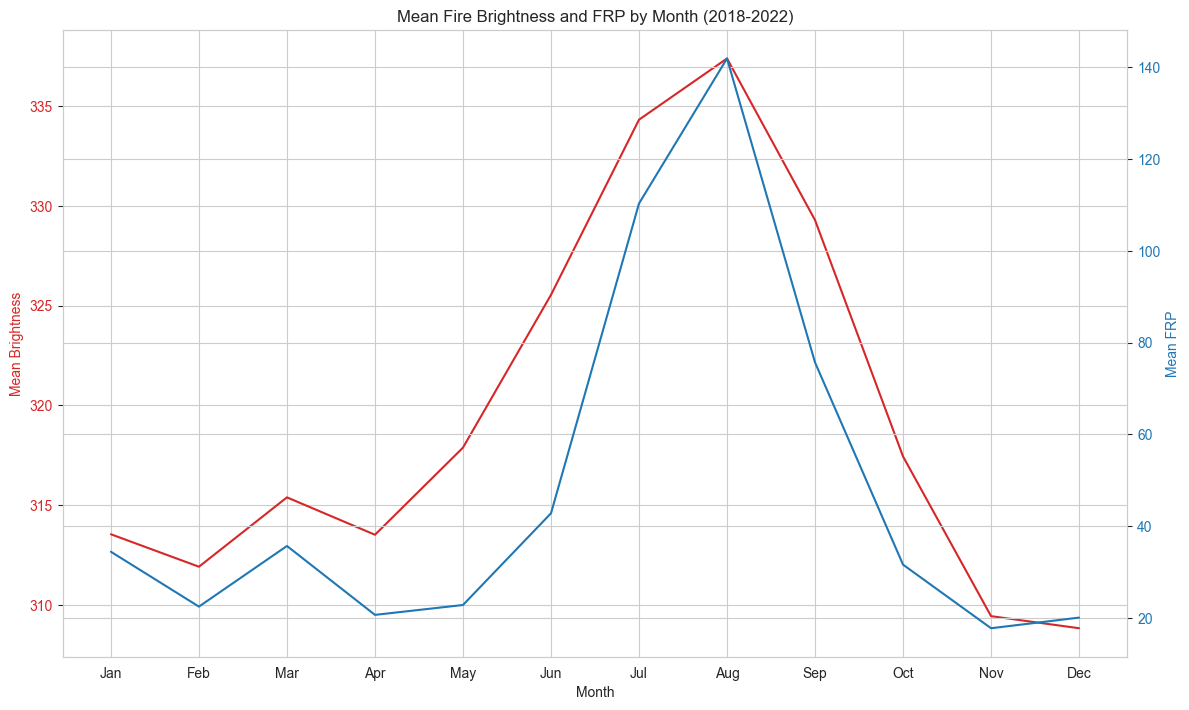

In [9]:
# Analysis of Fire Intensity by Month
# Group data by month and calculate mean brightness and FRP
intensity_by_month = df.groupby('month')[['brightness', 'frp']].mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 7))

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Mean Brightness', color=color)
ax1.plot(intensity_by_month.index, intensity_by_month['brightness'], color=color, label='Mean Brightness')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Mean FRP', color=color)  
ax2.plot(intensity_by_month.index, intensity_by_month['frp'], color=color, label='Mean FRP')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Mean Fire Brightness and FRP by Month (2018-2022)')
plt.show()

# Correlation Analysis

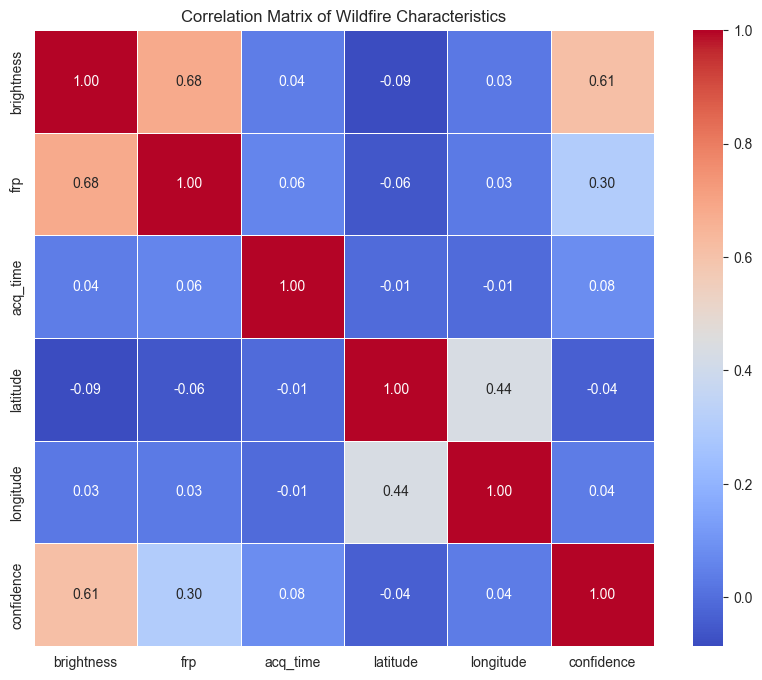

In [10]:
# Selecting relevant columns for correlation analysis
correlation_data = df[['brightness', 'frp', 'acq_time', 'latitude', 'longitude', 'confidence']]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Wildfire Characteristics')
plt.show()

# Impact of Day vs. Night on Detection

In [11]:
# Number of Wildfires Detected

# Grouping data by daynight and calculating the metrics
day_night_comparison = df.groupby('daynight').agg({'brightness': ['count', 'mean'], 'frp': 'mean'}).reset_index()
day_night_comparison.columns = ['Day/Night', 'Number of Wildfires', 'Average Brightness', 'Average FRP']

day_night_comparison

,Day/Night,Number of Wildfires,Average Brightness,Average FRP
0,D,4261,327.436846,83.336024
1,N,2890,325.666194,81.381246


# Type of Fires

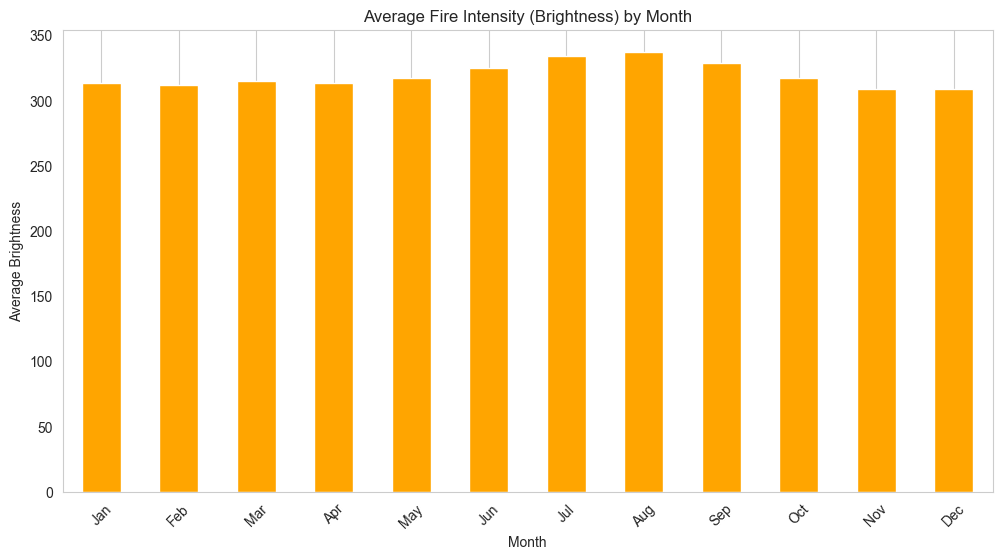

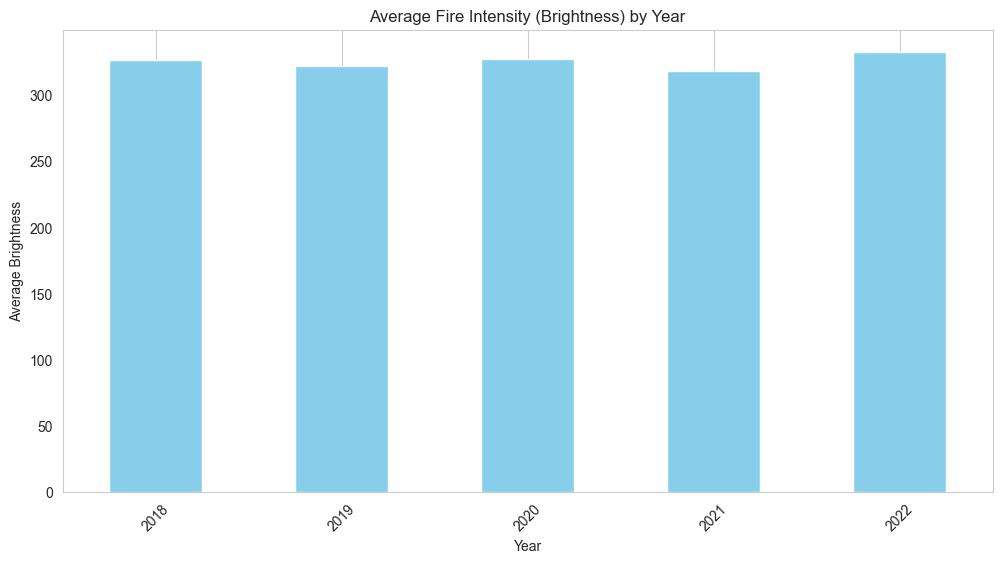

In [12]:
# Calculating average brightness by month and by year
avg_brightness_by_month = df.groupby('month')['brightness'].mean()
avg_brightness_by_year = df.groupby('year')['brightness'].mean()

# Plotting average brightness by month
plt.figure(figsize=(12, 6))
avg_brightness_by_month.plot(kind='bar', color='orange')
plt.title('Average Fire Intensity (Brightness) by Month')
plt.xlabel('Month')
plt.ylabel('Average Brightness')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')

# Plotting average brightness by year
plt.figure(figsize=(12, 6))
avg_brightness_by_year.plot(kind='bar', color='skyblue')
plt.title('Average Fire Intensity (Brightness) by Year')
plt.xlabel('Year')
plt.ylabel('Average Brightness')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

# Average Fire Radiative Power (FRP)

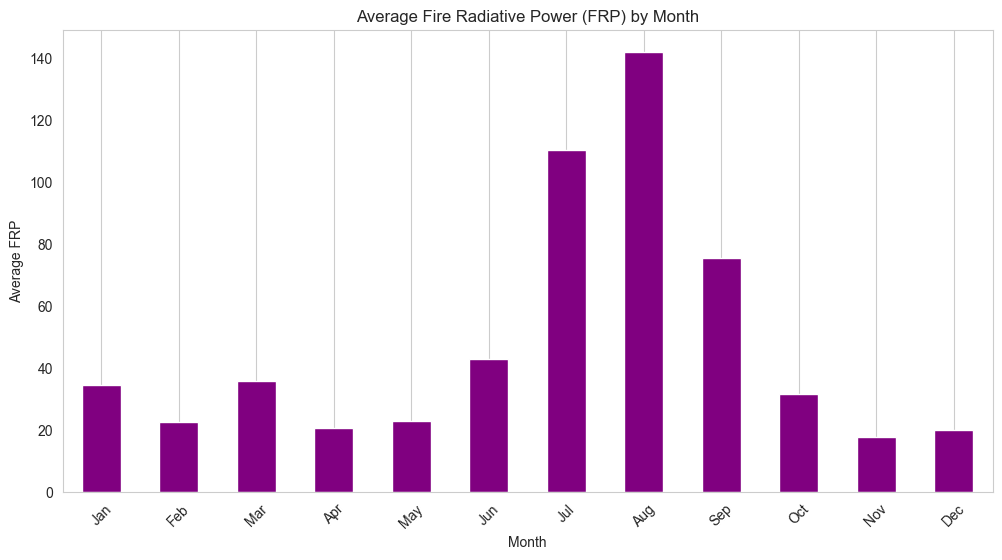

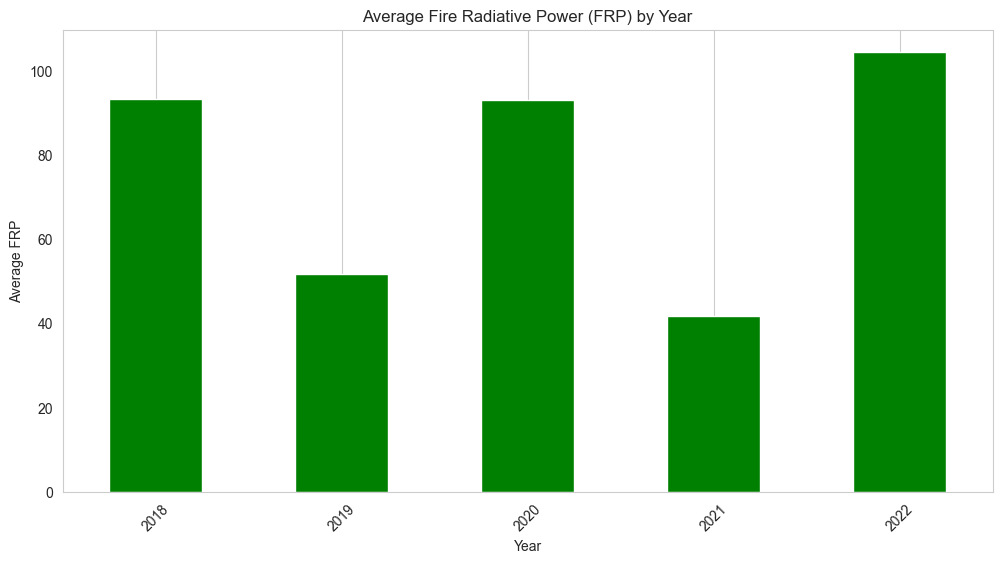

In [20]:
# Calculating average FRP by month and by year
avg_frp_by_month = df.groupby('month')['frp'].mean()
avg_frp_by_year = df.groupby('year')['frp'].mean()

# Plotting average FRP by month
plt.figure(figsize=(12, 6))
avg_frp_by_month.plot(kind='bar', color='purple')
plt.title('Average Fire Radiative Power (FRP) by Month')
plt.xlabel('Month')
plt.ylabel('Average FRP')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')

# Plotting average FRP by year
plt.figure(figsize=(12, 6))
avg_frp_by_year.plot(kind='bar', color='green')
plt.title('Average Fire Radiative Power (FRP) by Year')
plt.xlabel('Year')
plt.ylabel('Average FRP')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()